In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [8]:
df = pd.read_csv('ufc_fights_3yrs_from_7_8_23.csv')

In [9]:
df["date"] = pd.to_datetime(df["date"])

In [10]:
df.sort_values(by=['date'], ascending=False, inplace=True)
df = df.reset_index(drop=True)

In [12]:
fighter_names = pd.concat([df['fighter1'], df['fighter2']])

# # Create a mapping of unique fighter names to unique identifiers
unique_fighters = fighter_names.unique()
fighter_id_map = {fighter: idx for idx, fighter in enumerate(unique_fighters)}

# Map fighter names in 'fighter1' and 'fighter2' columns to their respective identifiers
df['fighter1_id'] = df['fighter1'].map(fighter_id_map)
df['fighter2_id'] = df['fighter2'].map(fighter_id_map)

# # Display the mapping of fighter names to their corresponding identifiers
print("Fighter Name to ID Mapping:")
for fighter, fighter_id in fighter_id_map.items():
    print(f"{fighter}: {fighter_id}")

Fighter Name to ID Mapping:
Ricky Simon: 0
Charles Jourdain: 1
Joe Pyfer: 2
Ian Machado Garry: 3
Anthony Smith: 4
Dan Ige: 5
Mayra Bueno Silva: 6
Alex Pereira: 7
Andrei Arlovski: 8
Cub Swanson: 9
Michelle Waterson-Gomez: 10
Payton Talbott: 11
Rei Tsuruya: 12
Rinat Fakhretdinov: 13
Kyung Ho Kang: 14
Robert Whittaker: 15
Nasrat Haqparast: 16
Kelvin Gastelum: 17
Muhammad Naimov: 18
Shara Magomedov: 19
Johnny Walker: 20
Sergei Pavlovich: 21
Magomed Gadzhiyasulov: 22
Xiao Long: 23
Jeka Saragih: 24
Douglas Silva de Andrade: 25
Brady Hiestand: 26
Melquizael Costa: 27
Timmy Cuamba: 28
Carli Judice: 29
Josh Quinlan: 30
Asu Almabayev: 31
Josefine Knutsson: 32
Alex Perez: 33
Jimmy Flick: 34
Thiago Moises: 35
Cody Stamann: 36
John Castaneda: 37
Miguel Baeza: 38
Raul Rosas Jr.: 39
Brunno Ferreira: 40
Julian Marquez: 41
Brad Katona: 42
Dominick Reyes: 43
Jared Cannonier: 44
Charles Radtke: 45
Andrea Lee: 46
Rayanne dos Santos: 47
Eduarda Moura: 48
Kevin Holland: 49
Mitch Raposo: 50
Cesar Almeida: 51

In [90]:
data = df[(df["fighter1"]=="Joe Pyfer") | (df["fighter2"]=="Joe Pyfer")]
data[data.columns[6:]].head()

,method_of_victory,fight_duration,fight_format,f1_knockdown,f2_knockdown,f1_sig_strike_land,f2_sig_strike_land,f1_sig_strike_att,f2_sig_strike_att,f1_total_strike_land,...,f1_sub_att,f2_sub_att,f1_reversal,f2_reversal,f1_control_time,f2_control_time,fighter1_id,fighter2_id,fighter1_past3,fighter2_past3
2,KO/TKO,85,3,1,0,8,0,10,5,8,...,0,0,0,0,0,0,2,429,1,1
235,Decision - Unanimous,1500,5,0,0,121,92,235,250,188,...,0,0,0,0,188,50,225,2,-1,3
376,Submission,425,3,0,0,26,11,62,28,26,...,2,1,0,0,67,8,2,716,2,1
670,KO/TKO,195,3,0,0,10,14,21,24,10,...,0,0,0,0,0,16,165,2,1,1
922,KO/TKO,235,3,1,0,14,11,45,30,14,...,0,0,0,0,3,0,2,920,0,-1


In [89]:
data[data["fighter1"]=="Joe Pyfer"]["f1_sig_strike_land"].sum()  +  data[data["fighter2"]=="Joe Pyfer"]["f2_sig_strike_land"].sum() 

154

In [85]:
len(data)

5

In [21]:
X = df[df.columns[8:]]
y = df['fight_duration']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Predict fight durations for test data
predicted_durations = regression_model.predict(X_test)
upper_bound_3_rounds = 900
upper_bound_5_rounds = 1500
import numpy as np
for i in range(len(predicted_durations)):
    if X_test.iloc[i]['fight_format'] == 3 and predicted_durations[i] > upper_bound_3_rounds:
        predicted_durations[i] = upper_bound_3_rounds
    elif X_test.iloc[i]['fight_format'] == 5 and predicted_durations[i] > upper_bound_5_rounds:
        predicted_durations[i] = upper_bound_5_rounds

# Using numpy for more efficient clipping
#predicted_durations_clipped = np.where(X_test['fight_format'] == 3, np.minimum(predicted_durations, upper_bound_3_rounds), np.minimum(predicted_durations, upper_bound_5_rounds))

In [37]:
# Evaluate the model
mse = mean_squared_error(y_test, predicted_durations)
r2 = r2_score(y_test, predicted_durations)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 14452.701873493954
R-squared: 0.8928384798985205


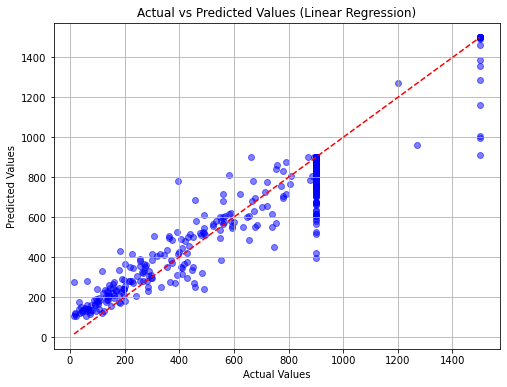

In [38]:
import matplotlib.pyplot as plt

# Scatter plot for actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predicted_durations, color='blue', alpha=0.5)
plt.title('Actual vs Predicted Values (Linear Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # Diagonal line for reference
plt.grid(True)
plt.show()

In [39]:
coefficients = regression_model.coef_
feature_names = X_train.columns  # Assuming X_train is a DataFrame

# Create a DataFrame to store coefficients with their corresponding feature names
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the features by absolute coefficient values to find the most important features
feature_importance['Absolute_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Absolute_Coefficient', ascending=False)

# Display the most important features
print(feature_importance)

                 Feature  Coefficient  Absolute_Coefficient
0           fight_format    73.344360             73.344360
1           f1_knockdown   -13.758712             13.758712
15            f1_sub_att   -11.772532             11.772532
16            f2_sub_att   -11.374396             11.374396
2           f2_knockdown   -11.317010             11.317010
14       f2_takedown_att     6.571253              6.571253
13       f1_takedown_att     5.417975              5.417975
12      f2_takedown_land    -4.665814              4.665814
11      f1_takedown_land    -3.874027              3.874027
5      f1_sig_strike_att     3.872956              3.872956
3     f1_sig_strike_land    -3.464408              3.464408
6      f2_sig_strike_att     3.090856              3.090856
4     f2_sig_strike_land    -2.577393              2.577393
18           f2_reversal    -2.145444              2.145444
7   f1_total_strike_land     2.081072              2.081072
9    f1_total_strike_att    -1.618807   

In [40]:
# Function to calculate past 3 fight results for each fighter at that time
def calculate_past3(row, df):
    fighter1 = row['fighter1']
    fighter2 = row['fighter2']
    
    # Get the index of the current row
    current_index = row.name
    
    # Filter the DataFrame for fights prior to the current row
    past_fights = df.iloc[current_index+1:]
    
    # Filter past fights for each fighter's past 3 fights
    past_fights_fighter1 = past_fights[((past_fights['fighter1'] == fighter1) | (past_fights['fighter2'] == fighter1))].head(3)
    past_fights_fighter2 = past_fights[((past_fights['fighter1'] == fighter2) | (past_fights['fighter2'] == fighter2))].head(3)
    
    # Calculate wins and losses for fighter1 regardless of their position
    fighter1_wins = (((past_fights_fighter1['fighter1'] == fighter1) & (past_fights_fighter1['result'] == 1)) |
                     ((past_fights_fighter1['fighter2'] == fighter1) & (past_fights_fighter1['result'] == 0))).sum()
    
    fighter1_losses = (((past_fights_fighter1['fighter1'] == fighter1) & (past_fights_fighter1['result'] == 0)) |
                       ((past_fights_fighter1['fighter2'] == fighter1) & (past_fights_fighter1['result'] == 1))).sum()
    
    # Calculate wins and losses for fighter2 regardless of their position
    fighter2_wins = (((past_fights_fighter2['fighter1'] == fighter2) & (past_fights_fighter2['result'] == 1)) |
                     ((past_fights_fighter2['fighter2'] == fighter2) & (past_fights_fighter2['result'] == 0))).sum()
    
    fighter2_losses = (((past_fights_fighter2['fighter1'] == fighter2) & (past_fights_fighter2['result'] == 0)) |
                       ((past_fights_fighter2['fighter2'] == fighter2) & (past_fights_fighter2['result'] == 1))).sum()
    
    # Return sum of wins and losses for each fighter
    return pd.Series({
        'fighter1_past3': fighter1_wins - fighter1_losses,
        'fighter2_past3': fighter2_wins - fighter2_losses
    })

# Apply the function row-wise to calculate past 3 fight results at each time point
df[['fighter1_past3', 'fighter2_past3']] = df.apply(lambda row: calculate_past3(row, df), axis=1)

# Display the DataFrame with past 3 fight results at each time point


In [43]:
#features to clean
#location - location to altitude map
#encode method of victory to an integer map
#fighrter specific stats - age and reach

In [58]:
!pip install --user fastai --no-warn-script-location

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from fastai.tabular.all import *
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('ufc_fights_3yrs_from_7_8_23.csv')

# Preprocess the data
data['date'] = pd.to_datetime(data['date'])

#sort the df by date
data.sort_values(by=['date'], ascending=False, inplace=True)
data = data.reset_index(drop=True)

#map fighter names to an integer id
fighter_names = pd.concat([data['fighter1'], data['fighter2']])

# # Create a mapping of unique fighter names to unique identifiers
unique_fighters = fighter_names.unique()
fighter_id_map = {fighter: idx for idx, fighter in enumerate(unique_fighters)}

# Map fighter names in 'fighter1' and 'fighter2' columns to their respective identifiers
data['fighter1_id'] = data['fighter1'].map(fighter_id_map)
data['fighter2_id'] = data['fighter2'].map(fighter_id_map)

# # Display the mapping of fighter names to their corresponding identifiers
print("Fighter Name to ID Mapping:")
for fighter, fighter_id in fighter_id_map.items():
    print(f"{fighter}: {fighter_id}")

    
#Create new features which is a score of their past 3 fights
data[['fighter1_past3', 'fighter2_past3']] = data.apply(lambda row: calculate_past3(row, df), axis=1)


# # Encode categorical features
# encoder = OneHotEncoder()
# encoded_features = encoder.fit_transform(data[['method_of_victory', 'fight_format']]).toarray()
# encoded_feature_names = encoder.get_feature_names_out(['method_of_victory', 'fight_format'])
# encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)

# # Concatenate encoded features and drop original categorical columns
# data = pd.concat([data, encoded_df], axis=1)
# data = data.drop(['method_of_victory', 'fight_format', 'date', 'event', 'location', 'fighter1', 'fighter2'], axis=1)

# # Define features and target
# features = data.drop('fight_duration', axis=1)
# target = data['fight_duration']

X = data[data.columns[8:]]
y = data['fight_duration']

# Normalize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(X)

# Convert features_scaled back to DataFrame for fastai
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

# Combine features and target back into a single DataFrame for fastai
data_processed = pd.concat([features_scaled_df, target.reset_index(drop=True)], axis=1)

# Split the data into training and testing sets
train_df, test_df = train_test_split(data_processed, test_size=0.2, random_state=42)

# Prepare the fastai data loaders
dls = TabularDataLoaders.from_df(train_df, path='.', y_names='fight_duration', valid_idx=list(test_df.index), bs=32)

# Define and train the model
learn = tabular_learner(dls, layers=[200,100], metrics=rmse)
learn.fit_one_cycle(5, 1e-3)

# Evaluate the model
preds, targets = learn.get_preds(dl=dls.valid)
preds = preds.flatten().numpy()
targets = targets.numpy()

# Calculate evaluation metrics
mae = mean_absolute_error(targets, preds)
mse = mean_squared_error(targets, preds)
r2 = r2_score(targets, preds)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R-squared: {r2}')

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(targets, preds, color='blue', alpha=0.5)
plt.title('Actual vs Predicted Fight Durations')
plt.xlabel('Actual Fight Duration')
plt.ylabel('Predicted Fight Duration')
plt.plot([min(targets), max(targets)], [min(targets), max(targets)], linestyle='--', color='red')  # Diagonal line for reference
plt.grid(True)
plt.show()

ModuleNotFoundError: No module named 'fastai'